# Submission Dicoding NLP

## About this dataset

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

Feel free to [download dataset]( https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews) from Kaggle

### Citation

Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223.

# Get the dataset

We'll use the opendatasets library to download the data from Kaggle directly within Jupyter. Let's install and import opendatasets.

In [96]:
!pip install opendatasets --upgrade --quiet

In [97]:
import opendatasets as od

In [98]:
od.version()

'0.1.20'

The dataset can now be downloaded using od.download. When you execute od.download, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [99]:
dataset_url = 'https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews'

In [100]:
od.download(dataset_url)

Skipping, found downloaded files in "./trip-advisor-hotel-reviews" (use force=True to force download)


Once the above command is executed, the dataset is downloaded and extracted to the directory trip-advisor-hotel-reviews

In [101]:
import os

In [102]:
data_dir = './trip-advisor-hotel-reviews'

In [103]:
os.listdir(data_dir)

['tripadvisor_hotel_reviews.csv']

In [104]:
train_csv = data_dir + '/tripadvisor_hotel_reviews.csv'

Let's load the data from *tripadvisor_hotel_reviews.csv* using Pandas.

In [105]:
import pandas as pd

dataset = pd.read_csv(train_csv)

dataset

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


The dataset contains over 20,491 rows and 2 columns. Our Objectives is to create model to predict the value in the colums Rating.

Let's check the data types and missing values in the various columns.

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


# Plot Hotel Review Ratings

In [107]:
dataset.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Ratings of Hotels')

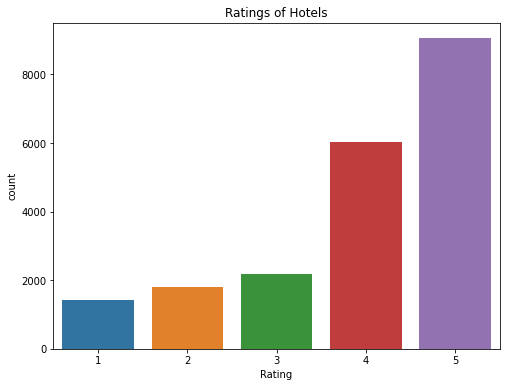

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(dataset["Rating"])
plt.title("Ratings of Hotels")

# Tokenizing text and creating sequences for sentences

Get Training and Testing dataset with split data become 80 percent and 20 percent respectively

In [126]:
# Get the reviews from the text column

reviews = dataset['Review'].tolist()
ratings = dataset['Rating'].tolist()

In [127]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(reviews) * 0.8)

In [128]:
# Split training 80% and testing 20%
training_reviews = reviews[0:training_size]
testing_reviews = reviews[training_size:]
training_ratings = ratings[0:training_size]
testing_ratings = ratings[training_size:]

In [129]:
# Make labels into numpy arrays for use with the network later

import numpy as np
training_ratings_final = np.array(training_ratings)
testing_ratings_final = np.array(testing_ratings)

Now you will tokenize text and create sequences for sentences as the first stage of preparing text for use with TensorFlow models.

In [130]:
# Import Tokenizer and pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
# Define variables first to make easier tokenization
vocab_size = 2000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_took = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_took)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

print(word_index)

# Sequences will be padded to the length of the longest individual sequence.
sequences = tokenizer.texts_to_sequences(training_reviews)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type,
                       truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_reviews)
testing_padded = pad_sequences(testing_sequences,
                               padding=padding_type, truncating=trunc_type)

{'<OOV>': 1, 'hotel': 2, 'room': 3, 'not': 4, 'great': 5, "n't": 6, 'good': 7, 'staff': 8, 'stay': 9, 'did': 10, 'nice': 11, 'rooms': 12, 'just': 13, 'location': 14, 'no': 15, 'stayed': 16, 'service': 17, 'night': 18, 'breakfast': 19, 'time': 20, 'clean': 21, 'day': 22, 'beach': 23, 'food': 24, 'like': 25, 'place': 26, 'really': 27, 'resort': 28, 'the': 29, 'friendly': 30, 'pool': 31, 'small': 32, '2': 33, 'people': 34, 'walk': 35, 'excellent': 36, 'little': 37, 'area': 38, 'got': 39, 'helpful': 40, '5': 41, 'best': 42, '3': 43, 'bar': 44, 'bathroom': 45, 'restaurant': 46, 'view': 47, 'bed': 48, 'restaurants': 49, 'trip': 50, 'recommend': 51, 'desk': 52, 'floor': 53, 'water': 54, 'comfortable': 55, 'nights': 56, 'went': 57, 'beautiful': 58, 'check': 59, 'right': 60, 'hotels': 61, 'city': 62, 'better': 63, 'wonderful': 64, 'away': 65, 'free': 66, 'way': 67, 'want': 68, '4': 69, 'street': 70, 'price': 71, 'booked': 72, 'bit': 73, 'make': 74, 'reviews': 75, 'large': 76, 'minutes': 77, 'ç'

In [132]:
len(sequences)

16392

In [133]:
padded.shape

(16392, 100)

In [134]:
len(testing_sequences)

4099

In [135]:
testing_padded.shape

(4099, 1662)

In [136]:
print(len(testing_padded))
print(len(testing_ratings_final))

4099
4099


Head [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) if you’d like to check out the full TensorFlow documentation for *Tokenizer*.

Head [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) if you’d like to check out the full TensorFlow documentation for *pad_sequences*.



## Review a Sequence

Let's quickly take a look at one of the padded sequences to ensure everything above worked appropriately.

In [137]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_reviews[1])


ok nothing special charge <OOV> member hilton decided chain <OOV> <OOV> anniversary seattle start booked suite paid extra website <OOV> not suite bedroom bathroom standard hotel room took <OOV> reservation desk showed said things like tv <OOV> <OOV> desk clerk told oh mixed suites <OOV> <OOV> website sorry free breakfast got <OOV> embassy <OOV> sitting room bathroom bedroom unlike <OOV> calls suite 5 day stay offer correct <OOV> <OOV> send <OOV> preferred guest website email asking <OOV> provide suite advertised website reservation <OOV> furnished hard <OOV> reservation <OOV> website desk manager duty did not <OOV> <OOV> send email trip guest
ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidd

In [121]:
print(len(reverse_word_index))

44788


## Train a Basic Sentiment Model with Embeddings

In [138]:
# Build a basic reviews network
# Note the embedding layer is first

# Define embedding dimension as variable
embedding_dim = 16 

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(5, activation='softmax')
])

In [139]:
# Compile function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           32000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 245,509
Trainable params: 245,509
Non-trainable params: 0
_________________________________________________________________


In [141]:
num_epochs = 30
history = model.fit(padded, training_ratings_final, epochs=num_epochs, validation_data=(testing_padded, testing_ratings_final))

Epoch 1/30


ValueError: ignored

In [142]:
padded.shape

(16392, 100)

In [144]:
len(training_ratings_final)

16392

In [143]:
testing_padded.shape

(4099, 1662)

In [145]:
len(testing_ratings_final)

4099

If you want to learn more on why word embeddings are used in NLP, check out this [useful post](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2).



Tensorflow Documentation:


[1] [Word Embedding](https://www.tensorflow.org/text/guide/word_embeddings)



[2] [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

# Courses as References

[1] [Part - 7 NLP](https://www.udemy.com/course/machinelearning/)

[2] [Part 3 - RNN](https://www.udemy.com/course/deeplearning/)

[3] [Lesson 9 NLP: Tokenization and Embeddings and Lesson 10 NLP: RNN](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187 )
